In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

# TYPE A UNCERTAINTY
- Random error is calculated from series of observations and is defined by standard  deviation + standard  error of mean
- Systematical  error must be determined  by calibration
- Calibration point uncertainty: Reference instruments have always uncertainties that transfer to calibration coefficients
- Calibration residual: Physical sensors and instruments do not follow mathematical response functions and calibration curves exactly


Mean:  8.287770469905808e-14
Standard Deviation:  2.091050630545326e-05
Variance:  4.3724927395040054e-10
Covariance:  4.376869609113117e-10
Correlation:  1.0


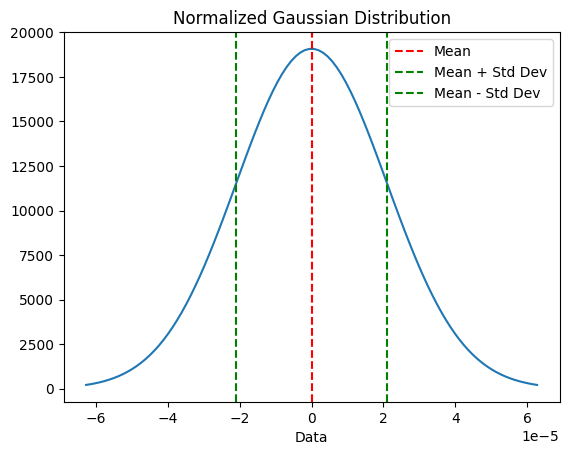

In [13]:
static_data = open('bright_n_dark.txt', 'r')
static_data = static_data.read()
static_data = static_data.split('\n')
#remove nulls
static_data = [i for i in static_data if i != '']
static_data = [float(i) for i in static_data]
static_data = np.array(static_data)

# Subtract the mean to center the Gaussian distribution at 0
static_data_centered = static_data - np.mean(static_data)

data_mean = np.mean(static_data_centered)
data_std = np.std(static_data_centered)
data_var = np.var(static_data_centered)
data_cov = np.cov(static_data_centered)
data_corr = np.corrcoef(static_data_centered)

print('Mean: ', data_mean)
print('Standard Deviation: ', data_std)
print('Variance: ', data_var)
print('Covariance: ', data_cov)
print('Correlation: ', data_corr)


# Calculate the normal distribution
x = np.linspace(data_mean - 3 * data_std, data_mean + 3 * data_std, 100)
y = scipy.stats.norm.pdf(x, data_mean, data_std)

# Normalize the y-values for probability
y = y / np.trapz(y, x)

# Plot the normal distribution
plt.plot(x, y)
plt.title('Normalized Gaussian Distribution')
plt.xlabel('Data')
plt.axvline(x=data_mean, color='r', linestyle='--', label='Mean')
plt.axvline(x=data_mean + data_std, color='g', linestyle='--', label='Mean + Std Dev')
plt.axvline(x=data_mean - data_std, color='g', linestyle='--', label='Mean - Std Dev')
plt.legend()

plt.show()

In [4]:
# lets calculate how many data points are within 1 standard deviation
# of the mean
count = 0
for i in static_data:
    if i > data_mean-data_std and i < data_mean+data_std:
        count += 1

print('Number of data points within 1 standard deviation of the mean: ', count)
print('Percentage of data points within 1 standard deviation of the mean: ', count/len(static_data))

Number of data points within 1 standard deviation of the mean:  929
Percentage of data points within 1 standard deviation of the mean:  0.929


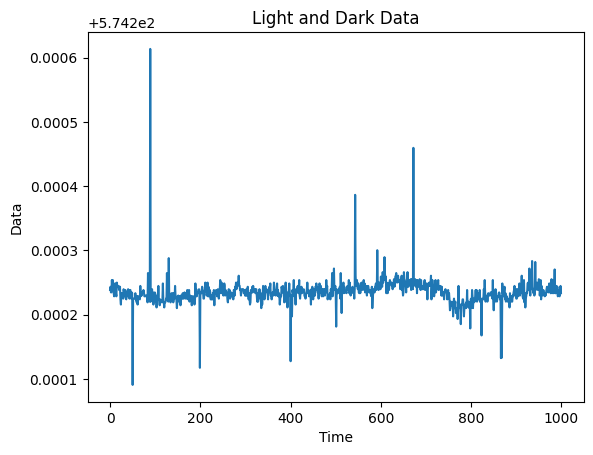

In [3]:
#lets take the light and dark file and watch the data change
light_n_dark = open('bright_n_dark.txt', 'r')
light_n_dark = light_n_dark.read()
light_n_dark = light_n_dark.split('\n')
#remove nulls
light_n_dark = [i for i in light_n_dark if i != '']
light_n_dark = [float(i) for i in light_n_dark]

#lets plot the data
plt.plot(light_n_dark)
plt.title('Light and Dark Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.show()